# Best neighborhood in Pittsburgh

## Team Square
[Maxwell Quinn](msq4@pitt.edu)|
[Keqing Jiang](kej58@pitt.edu)|
[Jacob Gudich](jjg125@pitt.edu)

![typing](https://media.giphy.com/media/PiQejEf31116URju4V/giphy.gif)

### Introduction

Using data from the WPRDC, the three dataset we considered are:

* **Incident Rate** (_Police Incident Blotter_)
    * The reason we choose the police incident data is because safety is always a primary consideration in choosing a neighborhood and the security of that neighborhood can be seen by the different crime incidents that are reported in different neighborhoods.
---
* **Facilities** (_City of Pittsburgh Facilities_)
    * Facilities are also an important consideration in choosing a neighborhood, and if a neighborhood has more facilities then that means the neighborhood has more access to different resources, which will make people’s lives more convenient.
---
* **Public School**(_Pittsburgh Public School Location_)
    * Public school is an important consideration because living in a neighborhood that is close to the  school will make life more convenient for both parents and children. Living close to a school can also reflect on the safeness of that neighborhood and the school yard can also be open for public use.

### The Metric 
1. _**[Police Incident Blotter(30 Day)](https://data.wprdc.org/dataset/police-incident-blotter)**_  
    * The 30-Day Police Blotter contains the most recent initial crime incident data, updated on a nightly basis. All data is reported at the block/intersection level, with the exception of sex crimes, which are reported at the police zone level. 
    * From this data we want to find out the neighborhood with the least reported incident in the past 30 days.
---
2. _**[City of Pittsburgh Facilities](https://data.wprdc.org/dataset/city-of-pittsburgh-facilities)**_ 
    * This dataset contains the information of different facilities in Pittsburgh, and the City Facility data pulled from the Operations Management System for the Department of Public Works. 
    * From this data we want to find out the neighborhood with the most facilities.
---
3. _**[Pittsburgh Public School Locations](https://data.wprdc.org/dataset/pittsburgh-public-school-locations)**_ 
    * This dataset has information about all the public schools around Pittsburgh, including name of the public school, location in Pittsburgh with latitude, longitude and zip code and address.
    * From this data we want to find out the neighborhood with the most schools.

#### We first import pandas and matplotlib for graphing

In [2]:
#import pandas
import pandas as pd
#import matplotlib for graphing
import matplotlib.pyplot as plt

#### Then import the data from a csv file and display the first 5 rows

In [3]:
blotter_data = pd.read_csv('BlotterData.csv')
facil = pd.read_csv("facil.csv")
school_locations = pd.read_csv("SchoolLocations.csv")

In [4]:
blotter_data.head()
facil.head()
school_locations.head()

,sourcedid,name,address,city,state,zip,latitude,longitude
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895


#### Use the information from the data we can create a pie chart to show the least/most reported incident, facilities, and public schools.

#### From the pie chart below we can see that 99(the emergency code), theft, and Hit and Run are the three incidents reported the most in the past 30 days.

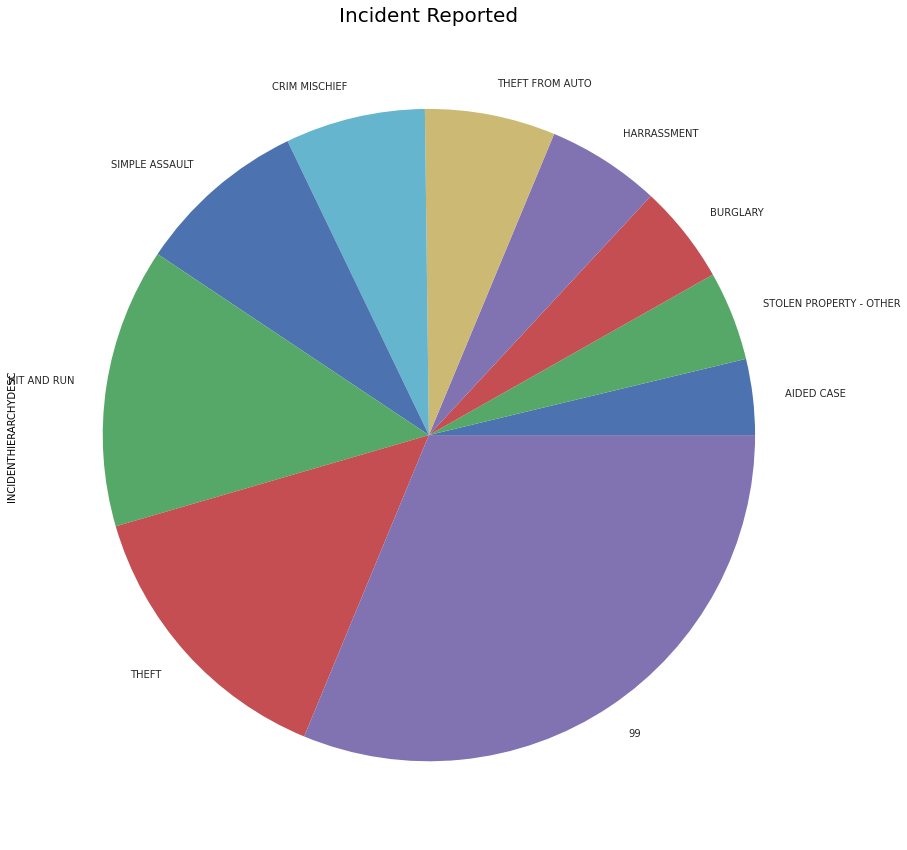

In [5]:
plt.rcParams['figure.figsize']=(25,15)
plt.title('Incident Reported', fontweight=20,fontsize=20)
plt.style.use("seaborn")
#Find out the most reported crime
rate=blotter_data.INCIDENTHIERARCHYDESC.value_counts()
#plot it as a bar graph
rate.iloc[:10].sort_values().plot.pie()
plt.xticks(rotation=90)
plt.show()

#### The least/most facilities another way and we can clearly see that shelter is first, dugout is second, and consession is third

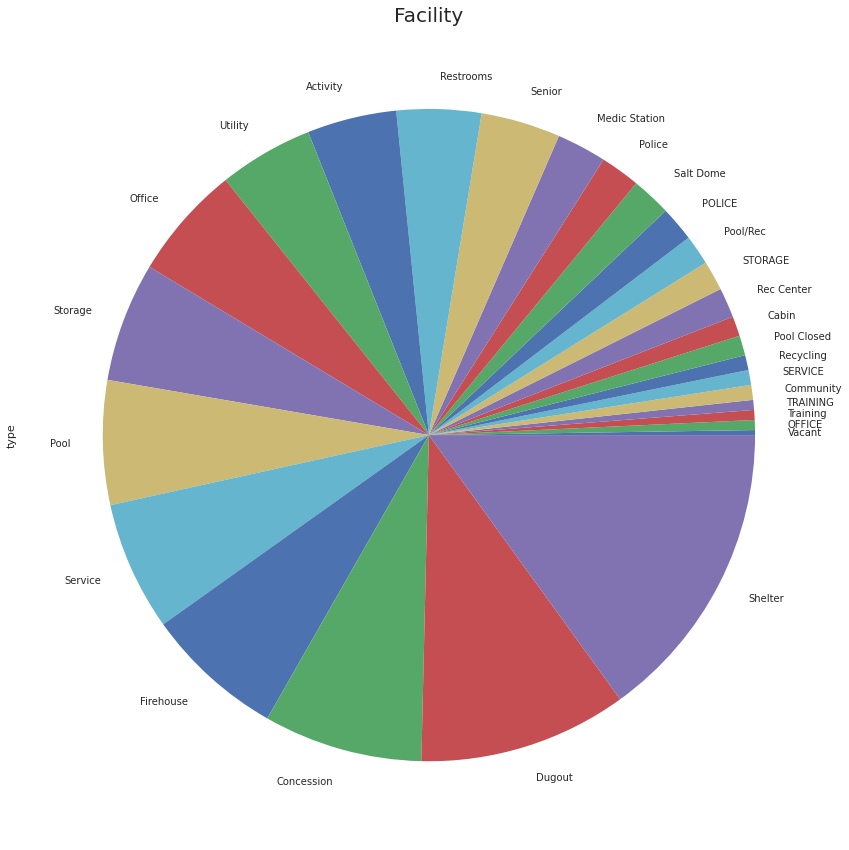

In [6]:
facil['type'].value_counts().sort_values(ascending=True)

plt.rcParams['figure.figsize']=(20,15)
plt.title('Facility', fontweight=20,fontsize=20)
plt.style.use("seaborn")
pie = facil.type.value_counts()
pie.iloc[:30].sort_values().plot.pie()
plt.xticks(rotation=90)
plt.show()

#### Since the data only show the location by zip code so we just count schools in each zip code and we can see that 15212 have the most schools

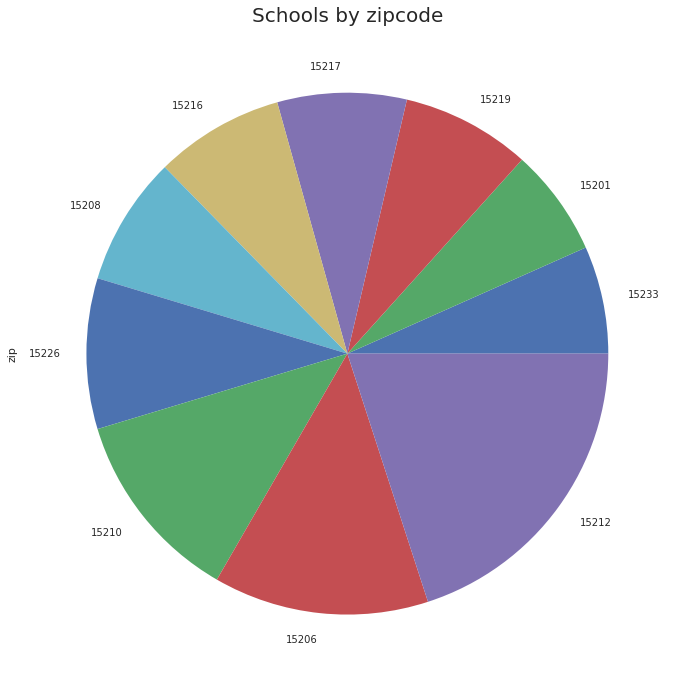

In [7]:
#count schools in each zip code
school_locations['zip'].value_counts().sort_values(ascending=True)

#Use the matplotlib for graphing
plt.rcParams['figure.figsize']=(20,12)
plt.title('Schools by zipcode', fontweight=20,fontsize=20)
plt.style.use("seaborn")
#Find out the most reported crime
zip=school_locations.zip.value_counts()
#bar graph
zip.iloc[:10].sort_values().plot.pie()
plt.xticks(rotation=90)
plt.show()

#### count the 20 neighborhoods that has the least incident reported in the past 30 days and count the 10 neighborhoods that include the most facilities

In [10]:
less_crime=blotter_data.groupby('INCIDENTNEIGHBORHOOD').size().sort_values(ascending=True)
less_crime.head(20)

INCIDENTNEIGHBORHOOD
Regent Square         2
Mt. Oliver Boro       2
Oakwood               2
Outside County        2
St. Clair             2
Ridgemont             3
Swisshelm Park        4
East Carnegie         4
Mount Oliver          4
Hays                  4
Allegheny West        6
Chartiers City        6
Glen Hazel            6
Arlington Heights     7
Esplen                8
Outside State         8
Polish Hill           9
Spring Garden         9
West End             10
Stanton Heights      12
dtype: int64

In [19]:
most = facil.groupby('neighborhood').size().sort_values(ascending=False)
most.head(10)

neighborhood
Highland Park          30
Squirrel Hill South    29
Perry North            20
Brookline              19
Strip District         15
Hazelwood              14
Brighton Heights       14
Carrick                12
Elliott                11
South Side Slopes      11
dtype: int64

#### We don't have to count the information in public schools like this because the pie chart above already show that 15212 have the most schools, so we have to covert the zip code

In [20]:
print("Towns in zip code 15212 are Allegheny Center, Allegheny West, Brighton Heights, California-Kirkbride, Central Northside, Chateau, East Allegheny, Fineview, Herrs Island, Manchester.")

Towns in zip code 15212 are Allegheny Center, Allegheny West, Brighton Heights, California-Kirkbride, Central Northside, Chateau, East Allegheny, Fineview, Herrs Island, Manchester.


---

### The best neighborhood in Pittsburgh
* **Police Incident Blotter (30 Day)**: 
    * Neighborhood in Pittsburgh that have the least indecent: **Regent Square**, with only *two* incidents reported in the past 30 days.
    * Neighborhood with the least incidents reported:

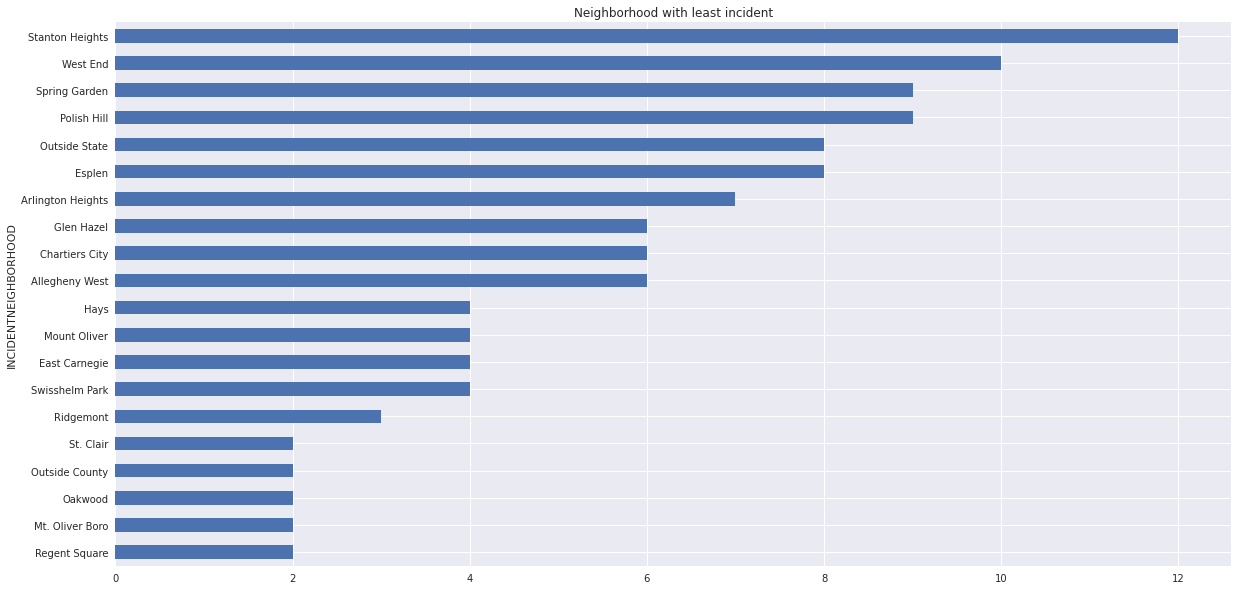

In [24]:
data = less_crime.head(20).plot(figsize=(20,10),kind='barh',title="Neighborhood with least incident")
plt.show()

* **City of Pittsburgh Facilities**: 
    * Neighborhood in Pittsburgh that have the most facilities: **Highland Park** with 30 facilities located in the neighborhood.
    * Neighborhood with the most facilities:

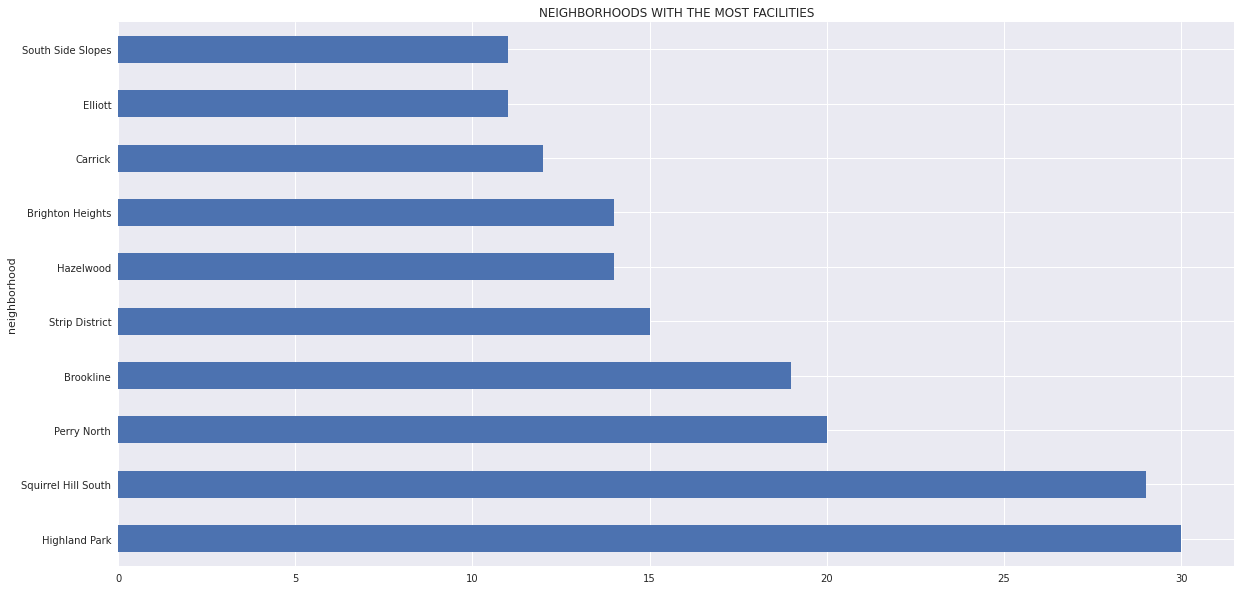

In [23]:
data = most.head(10).plot(figsize=(20,10),kind='barh',title="NEIGHBORHOODS WITH THE MOST FACILITIES")
plt.show()

* **Pittsburgh Public School Location**: 
    * Neighborhood in Pittsburgh that have the most facilities(zip code): 15212
        * Since this data only show the zip code so we have to convert the zip code into location and came up with a result:
            * Neighborhood in Pittsburgh that have the most school are: Allegheny Center, Allegheny West, Brighton Heights, California-Kirkbride, Central Northside, Chateau, East Allegheny, Fineview, Herrs Island, Manchester.

**Brighton Heights** shows up in both neighborhoods with the most facilities and schools but didn't appear in the neighborhood with the least incidents chart, therefore we have to find how many incidents reported in Brighton Height in the past 30 days.

In [21]:
# find the crime reported in Brighton Heights
less_crime=blotter_data.groupby('INCIDENTNEIGHBORHOOD').size().sort_values(ascending=True)
less_crime.loc['Brighton Heights']

59

In [58]:
#The most crime reported
less_crime=blotter_data.groupby('INCIDENTNEIGHBORHOOD').size().sort_values(ascending=False)
less_crime.head(1)

INCIDENTNEIGHBORHOOD
Central Business District    214
dtype: int64

* **59** cases reported in the past 30 days, but compare it to the most reported cases in the Central Business District (214 incidents reported), we can came up with a conclusion that the best neighborhood in Pittsburgh is **Brighton Heights** 

### Conclusion:

* KeQing:  
    * From my dataset, the best neighborhood is Regent Square with only two incidents reported in the past 30 days, and comparing it to Brighton Heights with 59 cases reported it shows that Regent Square is one of the safest neighborhoods in Pittsburgh. However, the Regent Square neighborhood doesn't have many facilities and schools compare to Brighton Heights, So Brighton Heights is the best neighborhood in Pittsburgh and Regent Square is the safest neighborhood in Pittsburgh.
---

* Maxwell: 
    * In my individual data set, Highland Park appeared to be the best neighborhood in Pittsburgh because of its 30 different facilities. Facilities such as shelters, firehouses, offices and pools not only make a neighborhood more desirable to live in because of the access to more resources, but can make the civilians' lives more entertaining. After combining the different metrics, we had to look at the three lists of top neighborhoods to see which one appeared the highest overall. Brighton Heights qualified all three metrics as being the best, and looking at my personal data set, it took the number 7 spot, which is still great at 14 facilities.
---

* Jacob: 
    * After looking at the public schools dataset, there were a few neighborhoods that I believed were the best due to the amount of schools they had or were near. These neighborhoods were Allentown,  Brighton Heights, California-Kirkbride, Central Northside, Chateau, and Manchester. All of these areas had about three zip codes where schools were nearby. After tallying them, I determined that there were 22 schools in these areas, and Brighton Heights was located near these three zip codes. 

---
![finish](https://media.giphy.com/media/3o6Mbnll2gudglC3HG/giphy.gif)

---